In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
#from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


EDA for the data
answer the questin : does age or gender, maybe both affect purchasing style ?

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Define a function to categorize age groups
def categorize_age(age):
    if age < 18:
        return 'child'
    elif age < 40:
        return 'adulthood'
    elif age < 60:
        return 'middle'
    else:
        return 'old'

# Apply the categorization function to create a new column 'age_group'
df['age_group'] = df['Age'].apply(categorize_age)

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_group
0,15624510,Male,19,19000,0,adulthood
1,15810944,Male,35,20000,0,adulthood
2,15668575,Female,26,43000,0,adulthood
3,15603246,Female,27,57000,0,adulthood
4,15804002,Male,19,76000,0,adulthood


In [7]:
# Group by 'age_group' and 'sex', then count the occurrences
grouped_counts=df.groupby(['age_group', 'Gender' ]).size().reset_index(name='count')
print(grouped_counts)

   age_group  Gender  count
0  adulthood  Female    116
1  adulthood    Male    122
2     middle  Female     86
3     middle    Male     69
4        old  Female      2
5        old    Male      5


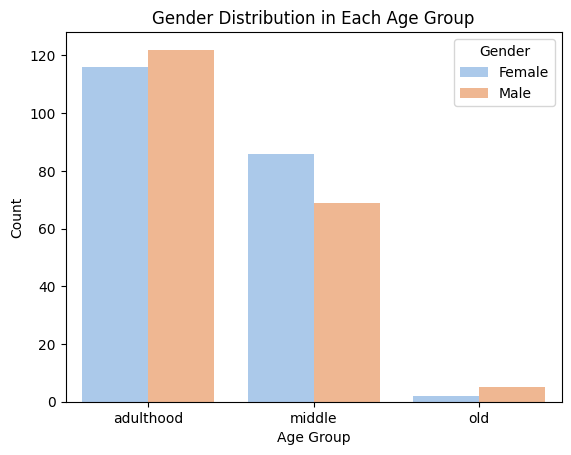

In [8]:
#visualise number of males and females in each catagory
# Plotting the bar graph
sns.barplot(x='age_group', y='count', hue='Gender', data=grouped_counts ,palette="pastel"  )

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Gender Distribution in Each Age Group')

# Display the plot
plt.show()

In [9]:
# Group by 'age_group' and 'sex', then count the occurrences
grouped_counts=df.groupby(['age_group', 'Gender','Purchased']).size().reset_index(name='count')
print(grouped_counts)

   age_group  Gender  Purchased  count
0  adulthood  Female          0     99
1  adulthood  Female          1     17
2  adulthood    Male          0    103
3  adulthood    Male          1     19
4     middle  Female          0     28
5     middle  Female          1     58
6     middle    Male          0     27
7     middle    Male          1     42
8        old  Female          1      2
9        old    Male          1      5


In [10]:
# Concatenate 'age_group' and 'sex' to represent both columns on x-axis
grouped_counts['age_gender'] = grouped_counts['age_group'] + ' ' + grouped_counts['Gender']

In [11]:
grouped_counts

,age_group,Gender,Purchased,count,age_gender
0,adulthood,Female,0,99,adulthood Female
1,adulthood,Female,1,17,adulthood Female
2,adulthood,Male,0,103,adulthood Male
3,adulthood,Male,1,19,adulthood Male
4,middle,Female,0,28,middle Female
5,middle,Female,1,58,middle Female
6,middle,Male,0,27,middle Male
7,middle,Male,1,42,middle Male
8,old,Female,1,2,old Female
9,old,Male,1,5,old Male


ppl between 40 and 60 adulthood 17 female purchased but 103 male

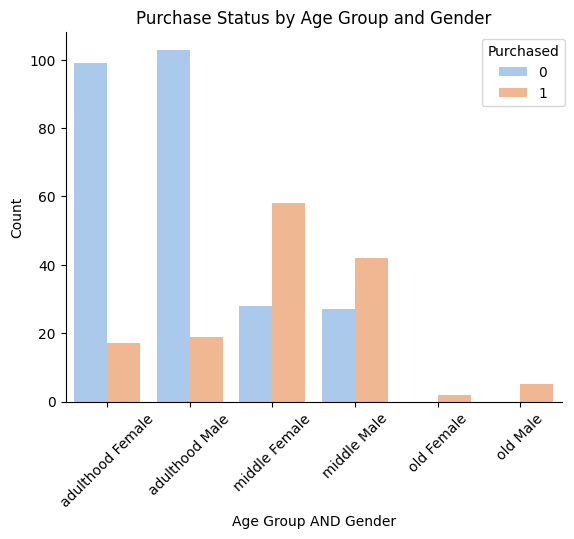

In [12]:

# Plotting using Seaborn
sns.barplot(x='age_gender' , y='count', hue='Purchased', data=grouped_counts,    palette="pastel"  )

# Adding labels and title
plt.xlabel('Age Group AND Gender')
plt.ylabel('Count')
plt.title('Purchase Status by Age Group and Gender')
# Rotate the x-axis labels of bars
plt.xticks(rotation=45)
# Remove the top and right spines/borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Move the legend to the top-right corner
plt.legend(title='Purchased', bbox_to_anchor=(1.02, 1), loc='upper right')




# Display the plot
plt.show()

In [14]:
print( df['EstimatedSalary'].max() )
print( df['EstimatedSalary'].min() )

print("Range of each column:")
print(df['EstimatedSalary'].max()-df['EstimatedSalary'].min() )

150000
15000
Range of each column:
135000


**Logestic Regression Section**

defining feature matrix(X) and response vector(y)
X contains the features (independent variables)
y contains the target variable (dependent variable)
EstimatedSalary is col 3 and Age is col 2 ,col 4 purchased

In [15]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values
# # X = df.EstimatedSalary
# # y = df.Purchased

# # split the train and test dataset
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=23)

In [16]:
# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):")
#Recall (also known as sensitivity or true positive rate) measures
# the proportion of actual positive cases that were correctly identified by the model.
#accuracy = (tp+tN)/ ALL
print ("Accuracy:", metrics.accuracy_score(y_test,  y_pred)*100)

print( 'F1 score:', metrics.f1_score(y_test,  y_pred, average='weighted')*100)
# proportion of actual positive cases that were correctly identified by the model

print ('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))
# percesion = TP / (TP +FP )  - positive predictions made by the model.
print ('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))

print( '\n clasification report:\n', metrics.classification_report(y_test, y_pred))
# True negatives (TN): 50
# # False positives (FP): 0
# False negatives (FN): 30
# True positives (TP): 0
print( '\n confussion matrix:\n',metrics.confusion_matrix(y_test,  y_pred))

Logistic Regression model accuracy(in %):
Accuracy: 62.5
F1 score: 48.07692307692308
Recall: 0.625
Precision: 0.390625

 clasification report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        50
           1       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


 confussion matrix:
 [[50  0]
 [30  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

**Add male and Female feature to the model and see results¶

try ne w feature at the logestic regression M and F**

In [17]:
df['Gender_encoded'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [18]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,age_group,Gender_encoded
0,15624510,Male,19,19000,0,adulthood,0
1,15810944,Male,35,20000,0,adulthood,0
2,15668575,Female,26,43000,0,adulthood,1
3,15603246,Female,27,57000,0,adulthood,1
4,15804002,Male,19,76000,0,adulthood,0
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,middle,1
396,15706071,Male,51,23000,1,middle,0
397,15654296,Female,50,20000,1,middle,1
398,15755018,Male,36,33000,0,adulthood,0


In [19]:
X=df.iloc[:,[2,3,6]].values
y=df.iloc[:,4].values
# # X = df.EstimatedSalary
# # y = df.Purchased

# # split the train and test dataset
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=23)

In [20]:
# create logistic regression object
reg = linear_model.LogisticRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):")
#Recall (also known as sensitivity or true positive rate) measures
# the proportion of actual positive cases that were correctly identified by the model.
#accuracy = (tp+tN)/ ALL
print ("Accuracy:", metrics.accuracy_score(y_test,  y_pred)*100)

print( 'F1 score:', metrics.f1_score(y_test,  y_pred, average='weighted')*100)
# proportion of actual positive cases that were correctly identified by the model

print ('Recall:', metrics.recall_score(y_test, y_pred,average='weighted'))
# percesion = TP / (TP +FP )  - positive predictions made by the model.
print ('Precision:', metrics.precision_score(y_test, y_pred,average='weighted'))

print( '\n clasification report:\n', metrics.classification_report(y_test, y_pred))
# True negatives (TN): 50
# # False positives (FP): 0
# False negatives (FN): 30
# True positives (TP): 0
print( '\n confussion matrix:\n',metrics.confusion_matrix(y_test,  y_pred))

Logistic Regression model accuracy(in %):
Accuracy: 62.5
F1 score: 48.07692307692308
Recall: 0.625
Precision: 0.390625

 clasification report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        50
           1       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


 confussion matrix:
 [[50  0]
 [30  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13